# **1. Perkenalan Dataset**


**Nama Dataset: Loan Status Prediction**

**Sumber: Kaggle**

**Link:** https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction?select=loan_data.csv

**Deskripsi:**

Dataset ini berisi data historis dari pemohon pinjaman yang digunakan untuk memprediksi apakah sebuah pengajuan pinjaman akan disetujui (Y) atau ditolak (N). Informasi yang tersedia mencakup berbagai aspek, mulai dari data demografis (jenis kelamin, status pernikahan, jumlah tanggungan), kondisi sosial-ekonomi (pendidikan, status pekerjaan, pendapatan pemohon dan pasangan), hingga informasi finansial terkait pinjaman (jumlah pinjaman, jangka waktu, dan riwayat kredit). Dengan kombinasi data kategorikal dan numerik, dataset ini menjadi dasar untuk membangun model machine learning klasifikasi biner yang membantu bank dalam mengambil keputusan persetujuan pinjaman secara lebih efisien dan akurat.

---
### **Overview:**

**Jenis Masalah:** Klasifikasi biner (Loan disetujui = Y, ditolak = N)

**Jumlah Atribut:** 12 fitur + 1 target (Loan_Status)

**Tipe Data:**

- **Kategorikal:** Gender, Married, Dependents, Education, Self_Employed, Property_Area

- **Numerik:** ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

- **Biner:** Credit_History

**Target (Label):** Loan_Status (Y = disetujui, N = ditolak)

**Tujuan Penggunaan:**
Membangun model machine learning yang dapat memprediksi kelayakan persetujuan pinjaman berdasarkan informasi demografis, sosial, dan finansial pemohon.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Manipulasi data
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Membaca dataset CSV
df = pd.read_csv("../loan_raw/loan_data.csv")

# Lihat 5 baris awal
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
# Info struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [4]:
# Cek ringkasan statistik
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Ukuran dataset
print("Jumlah baris & kolom:", df.shape)

Jumlah baris & kolom: (381, 13)


In [6]:
# Cek missing values
print(df.isnull().sum())

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


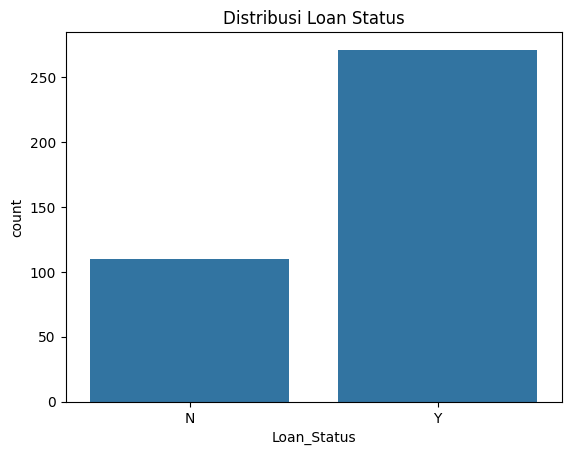

In [7]:
# Distribusi target
sns.countplot(x="Loan_Status", data=df)
plt.title("Distribusi Loan Status")
plt.show()

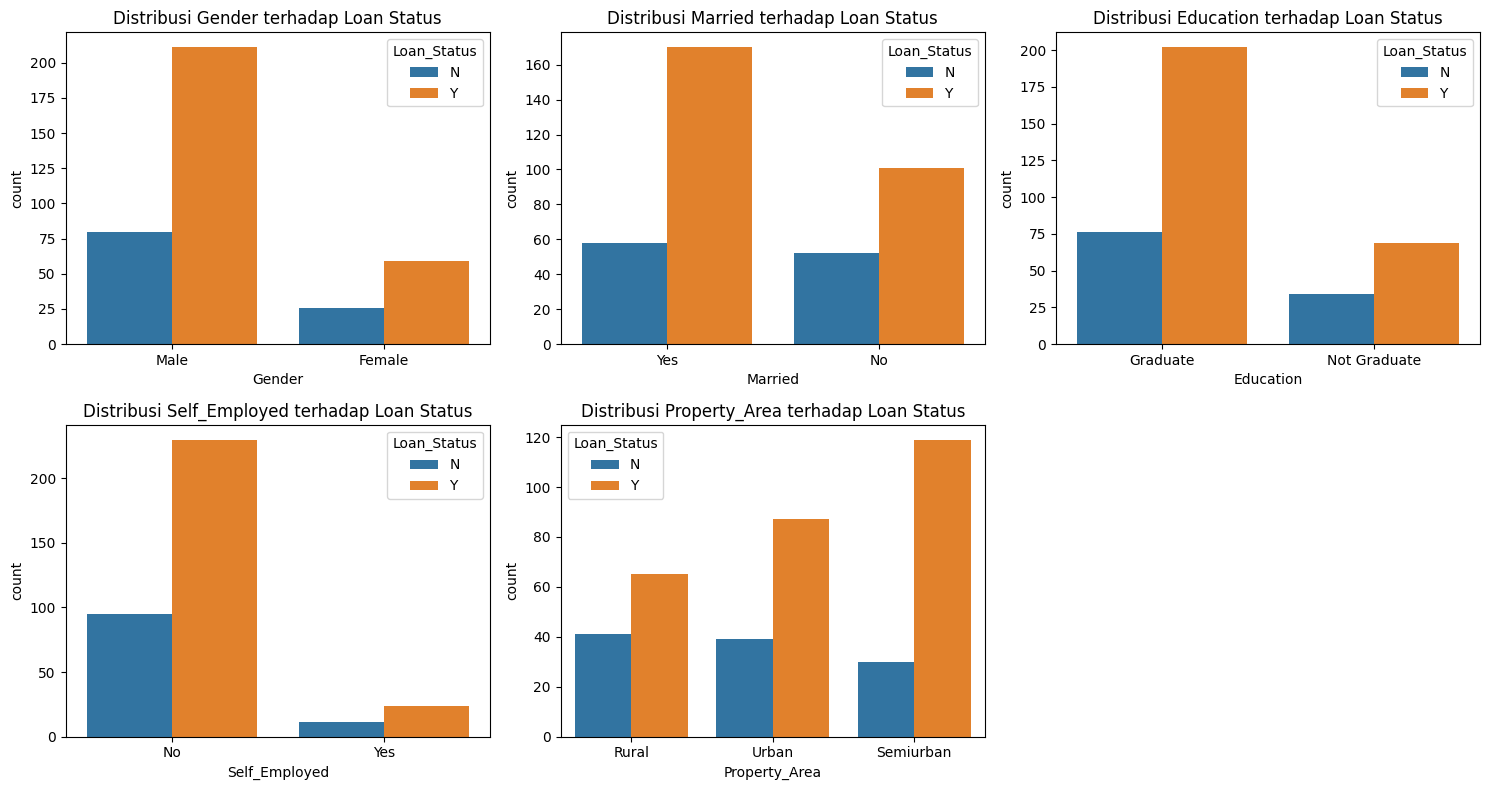

In [8]:
# Daftar kolom kategorikal
categorical_cols = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]

# Tentukan ukuran grid (misal 2 baris × 3 kolom)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Flatten axes biar bisa diiterasi dengan mudah
axes = axes.flatten()

# Loop untuk tiap kolom kategorikal
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue="Loan_Status", data=df, ax=axes[i])
    axes[i].set_title(f"Distribusi {col} terhadap Loan Status")

# Kosongkan subplot yang tidak terpakai (jika jumlah kolom ganjil)
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

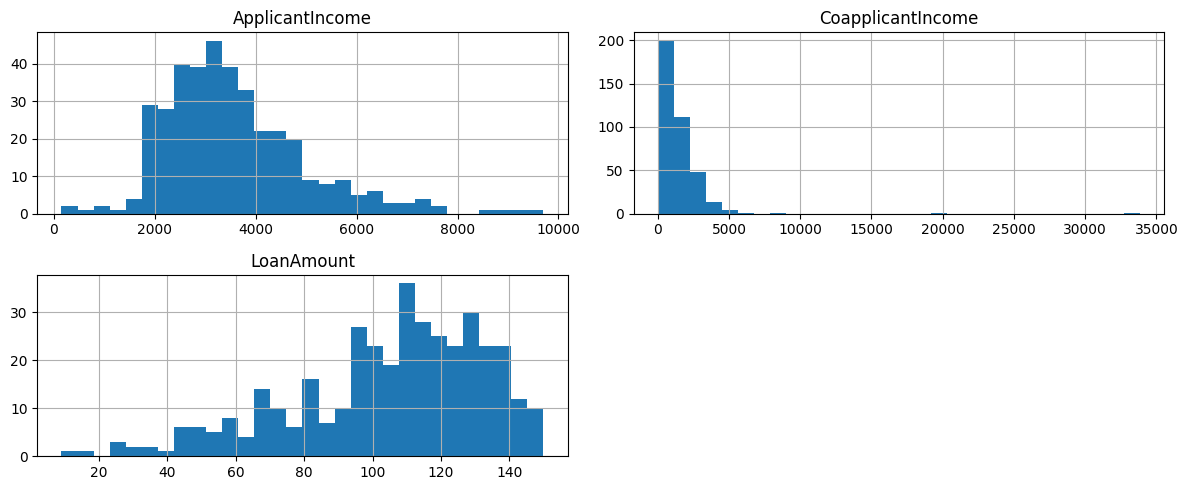

In [9]:
# Distribusi numerik
numerical_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]
df[numerical_cols].hist(bins=30, figsize=(12,5))
plt.tight_layout()
plt.show()

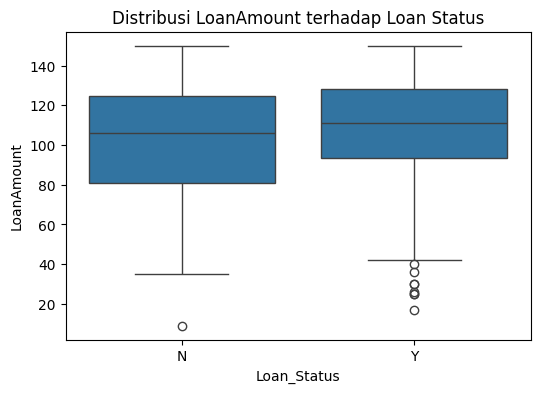

In [10]:
# Boxplot LoanAmount terhadap Loan_Status
plt.figure(figsize=(6,4))
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df)
plt.title("Distribusi LoanAmount terhadap Loan Status")
plt.show()

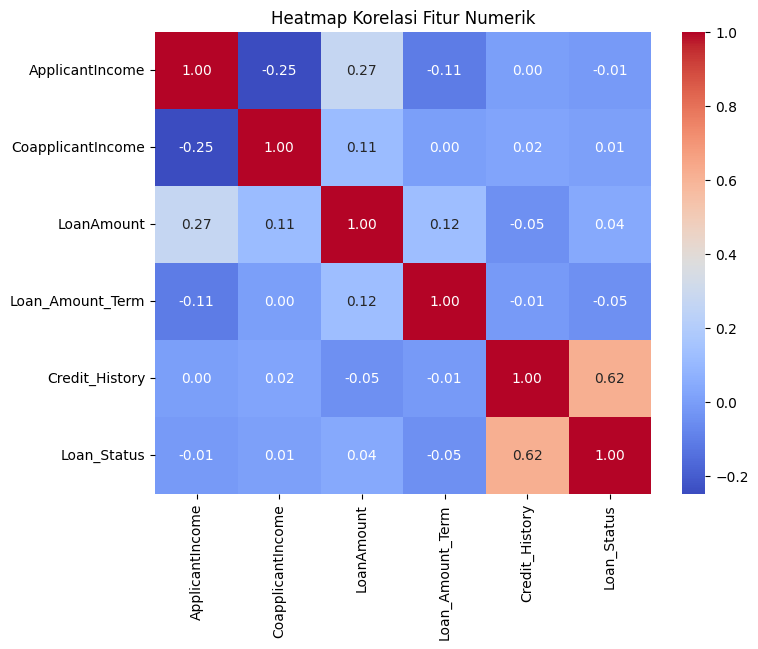

In [11]:
# Heatmap korelasi fitur numerik
df_corr = df.copy()
df_corr['Loan_Status'] = df_corr['Loan_Status'].map({'Y':1, 'N':0})

numeric_df = df_corr.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

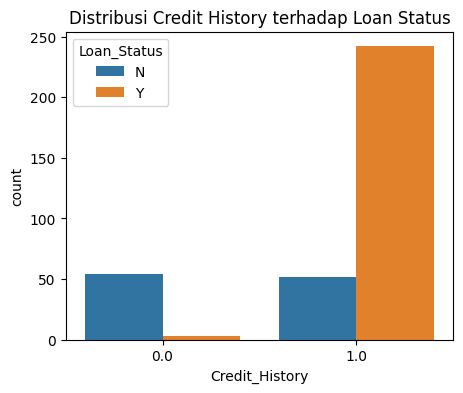

In [12]:
# Distribusi Credit_History terhadap Loan_Status
plt.figure(figsize=(5,4))
sns.countplot(x="Credit_History", hue="Loan_Status", data=df)
plt.title("Distribusi Credit History terhadap Loan Status")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
# Data Preprocessing

# 1. Drop Loan_ID (tidak berguna untuk prediksi)
if "Loan_ID" in df.columns:
    df = df.drop(columns=["Loan_ID"])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [14]:
# 2. Pisahkan target
y_raw = df["Loan_Status"]
X = df.drop(columns=["Loan_Status"])

In [15]:
# 3. Encode target (Loan_Status)
le = LabelEncoder()
y = le.fit_transform(y_raw)

In [16]:
# 4. Imputasi Missing Values
# Kategorikal: isi dengan modus
for col in ["Gender", "Dependents", "Self_Employed", "Married", "Education", "Property_Area"]:
    if X[col].isnull().sum() > 0:
        X[col] = X[col].fillna(X[col].mode()[0])

# Numerik: isi dengan median
for col in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]:
    if X[col].isnull().sum() > 0:
        X[col] = X[col].fillna(X[col].median())

# Cek Hasil
X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [17]:
# 5. One-hot encoding untuk kolom kategorikal
categorical_cols = ["Gender", "Married", "Education", "Self_Employed", 
                    "Dependents", "Property_Area"]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

# Cek hasil
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,1.0,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False
1,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,False,False,True,True,False,False,False,False,False,True
2,2583,2358.0,120.0,360.0,1.0,False,True,False,True,False,True,True,False,True,False,False,False,False,False,True
3,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,False,True,False,True,False,False,False,False,False,True
4,2333,1516.0,95.0,360.0,1.0,False,True,False,True,False,True,True,False,True,False,False,False,False,False,True


In [18]:
# 6. Feature Engineering
X["TotalIncome"] = X["ApplicantIncome"] + X["CoapplicantIncome"]
X["Income_to_Loan"] = X["TotalIncome"] / (X["LoanAmount"] + 1)

# Cek hasil
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Self_Employed_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,Income_to_Loan
0,4583,1508.0,128.0,360.0,1.0,False,True,False,True,True,...,False,False,True,False,False,True,False,False,6091.0,47.217054
1,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,...,True,True,False,False,False,False,False,True,3000.0,44.776119
2,2583,2358.0,120.0,360.0,1.0,False,True,False,True,False,...,False,True,False,False,False,False,False,True,4941.0,40.834711
3,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,...,False,True,False,False,False,False,False,True,6000.0,42.253521
4,2333,1516.0,95.0,360.0,1.0,False,True,False,True,False,...,False,True,False,False,False,False,False,True,3849.0,40.093750


In [19]:
# 7. Scaling fitur numerik
scaler = StandardScaler()
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", 
            "Loan_Amount_Term", "Credit_History", "TotalIncome", "Income_to_Loan"]

X[num_cols] = scaler.fit_transform(X[num_cols])

# Cek hasil
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Self_Employed_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,Income_to_Loan
0,0.707469,0.098695,0.812575,0.275147,0.419435,False,True,False,True,True,...,False,False,True,False,False,True,False,False,0.511157,-0.065361
1,-0.408932,-0.546371,-1.376596,0.275147,0.419435,False,True,False,True,True,...,True,True,False,False,False,False,False,True,-0.769346,-0.145088
2,-0.703019,0.462294,0.530102,0.275147,0.419435,False,True,False,True,False,...,False,True,False,False,False,False,False,True,0.034749,-0.273823
3,1.706799,-0.546371,1.271595,0.275147,0.419435,False,True,True,False,True,...,False,True,False,False,False,False,False,True,0.473459,-0.227481
4,-0.879330,0.102118,-0.352629,0.275147,0.419435,False,True,False,True,False,...,False,True,False,False,False,False,False,True,-0.417632,-0.298024


In [20]:
# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cek ukuran data
print("Ukuran data train:", X_train.shape)
print("Ukuran data test:", X_test.shape)

Ukuran data train: (304, 22)
Ukuran data test: (77, 22)


In [21]:
# Hasil Dataset Preprocessing
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Self_Employed_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,Income_to_Loan
183,0.578409,-0.546371,0.777266,0.275147,-2.384158,False,True,False,True,True,...,False,False,False,True,False,False,True,False,-0.189370,-0.484811
306,-1.055641,0.801082,0.812575,0.275147,0.419435,False,True,False,True,True,...,False,True,False,False,False,False,True,False,0.155715,-0.282603
6,-0.761554,0.240713,0.141700,0.275147,0.419435,False,True,False,True,True,...,False,False,False,True,False,False,False,True,-0.214227,-0.318902
270,-0.644484,1.293009,0.565411,0.275147,0.419435,False,True,False,True,True,...,False,True,False,False,False,True,False,False,0.873642,0.257384
368,-0.904719,0.104684,-0.034846,0.275147,0.419435,False,True,False,True,True,...,False,True,False,False,False,False,False,True,-0.430060,-0.419603
